# <center>Analysis of @realDonaldTrump Twitter Account</center>

### In using python for data science, numpy, pandas and matplotlib form the core external libraries that must first be imported.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import datetime
%matplotlib inline

### It's simple to read a csv file into a pandas DataFrame (which can be thought of as an in-memory spreadsheet with rows and columns).  Credit to Brendan Brown for scraping the Twitter account of @realDonaldTrump http://www.trumptwitterarchive.com/.

In [2]:
tweets = pd.read_csv('./data_file/trump_tweets.csv')

## <center>Typically data must first be cleaned before an analysis can be performed.</center>

### It's helpful to first take a look at the DataFrame with the DataFrame.head() command.

In [3]:
tweets.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,You are always there for us – THE MEN AND WOME...,12-15-2017 19:48:58,4408.0,17962,false,9.417570e+17
1,Twitter for iPhone,To each member of the graduating class from th...,12-15-2017 17:35:59,5093.0,25475,false,9.417235e+17
2,Twitter for iPhone,It was my honor. THANK YOU! https://t.co/1Lvqb...,12-15-2017 13:55:01,9007.0,45489,false,9.416679e+17
3,Twitter for iPhone,RT @GOPChairwoman: .@realDonaldTrump is the Pa...,12-14-2017 23:26:54,8845.0,0,true,9.414494e+17
4,Twitter for iPhone,“Manufacturing Optimism Rose to Another All-Ti...,12-14-2017 21:20:51,7619.0,31604,false,9.414177e+17


### The DataFrame.shape attribute provides the number of rows and columns.

In [4]:
tweets.shape

(29868, 7)

### A few columns contain data fields that could not be interpreted properly, in this case we will simply drop rows that contain these data fields.

In [5]:
tweets.dropna(inplace=True)

### There are now 7 fewer rows.

In [6]:
tweets.shape

(29861, 7)

### An examination of the column data types (object typically = string).

In [7]:
tweets.dtypes

source             object
text               object
created_at         object
retweet_count     float64
favorite_count     object
is_retweet         object
id_str            float64
dtype: object

### Change columns retweet_count and favorite_count to the integer data type.

In [8]:
tweets['retweet_count'] = tweets.retweet_count.astype(int)

In [9]:
tweets['favorite_count'] = tweets.favorite_count.astype(int)

### Change column is_retweet to the boolean data type ('false' and 'true' are python strings, not booleans).

In [10]:
tweets['is_retweet'] = tweets.is_retweet.map({'false': False, 'true': True})

### Change the created_at column to a pandas datetime object to allow for simple datetime parsing.

In [11]:
tweets['created_at'] = pd.to_datetime(tweets.created_at, utc=True).dt.tz_localize('UTC')

### Add the column US/Eastern which is the created_at column (in UTC time) converted to US/Eastern time (which also takes into account Daylight Savings Time conversions).

In [12]:
tweets['US/Eastern'] = tweets.created_at.dt.tz_convert('US/Eastern')

### Reexamine the DataFrame data types.

In [13]:
tweets.dtypes

source                                object
text                                  object
created_at               datetime64[ns, UTC]
retweet_count                          int64
favorite_count                         int64
is_retweet                              bool
id_str                               float64
US/Eastern        datetime64[ns, US/Eastern]
dtype: object

### A quick look at the device/source used to produce each tweet (note the preponderance of tweets produced from an Android device, remember, the account was created in 2009).

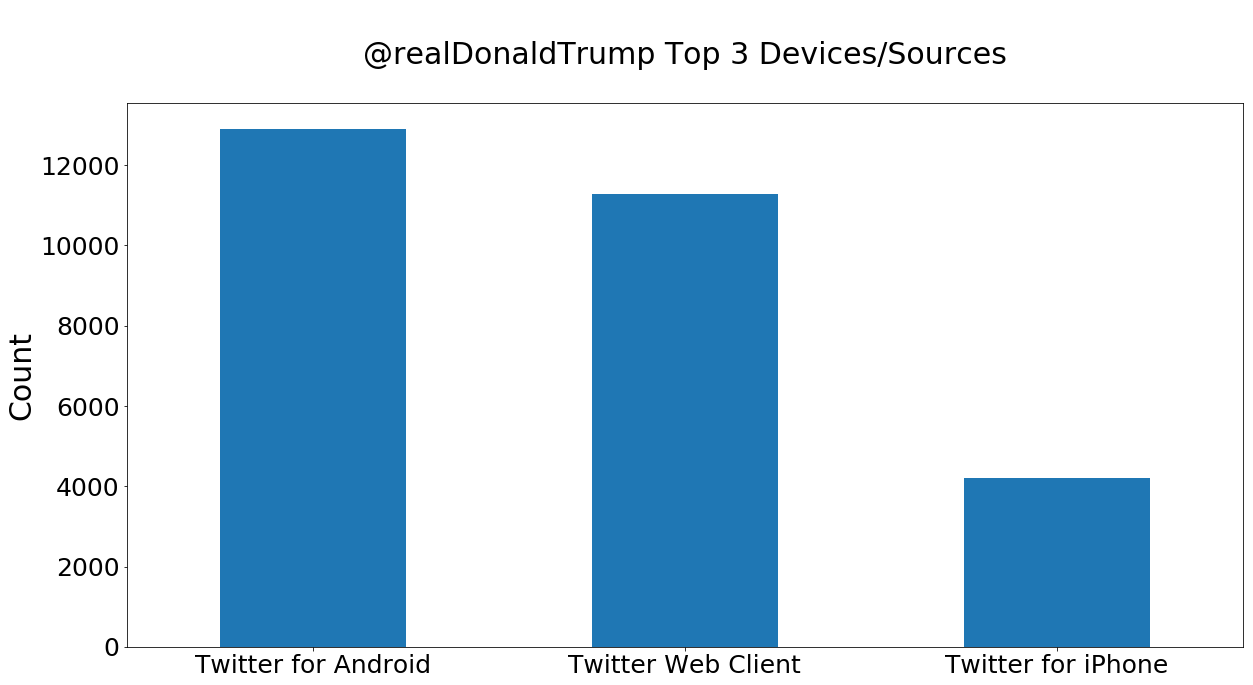

In [14]:
tweets.source.value_counts().iloc[:3].plot(kind='bar', figsize=(20, 10), fontsize=25, rot=0)
plt.ylabel('Count', size=30)
plt.title("\n@realDonaldTrump Top 3 Devices/Sources\n", size=30);

## <center>An analysis of tweets in a given year containing key words or phrases.</center>

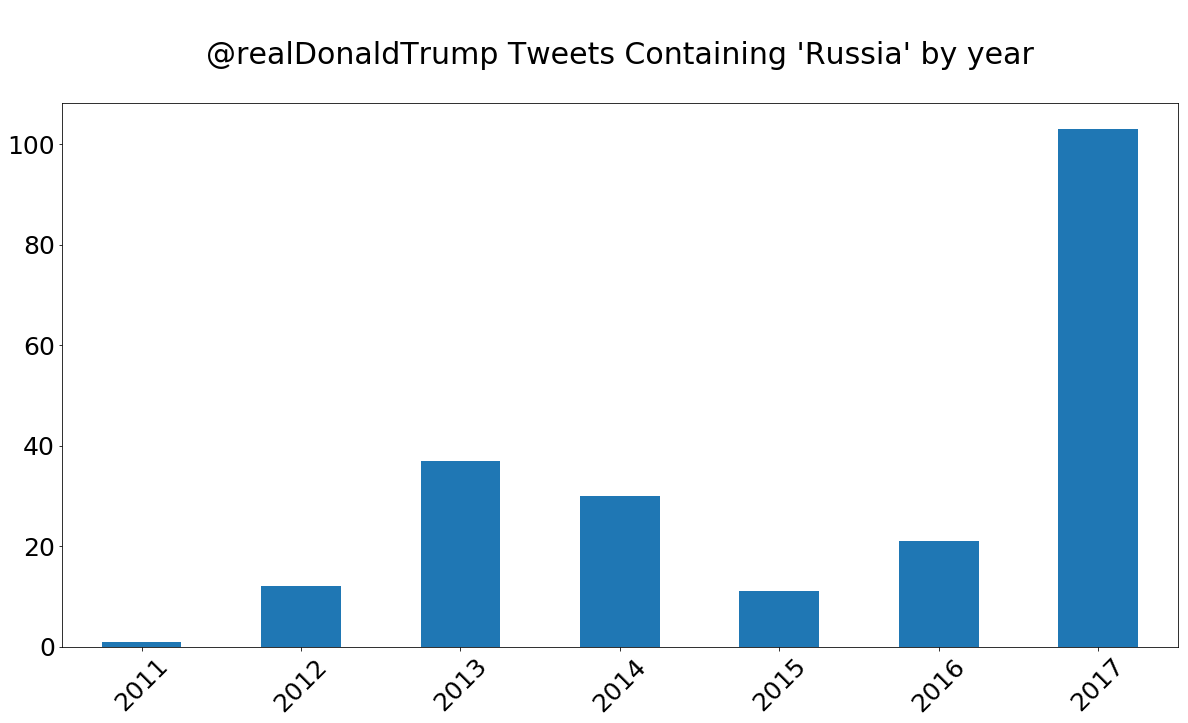

In [15]:
russia_filter = tweets.text.str.contains('russia',case=False)
tweets[russia_filter].created_at.dt.year.value_counts().sort_index().plot(kind='bar', 
    rot=45, figsize=(20, 10), fontsize=25)
plt.title("\n@realDonaldTrump Tweets Containing 'Russia' by year\n", size=30);

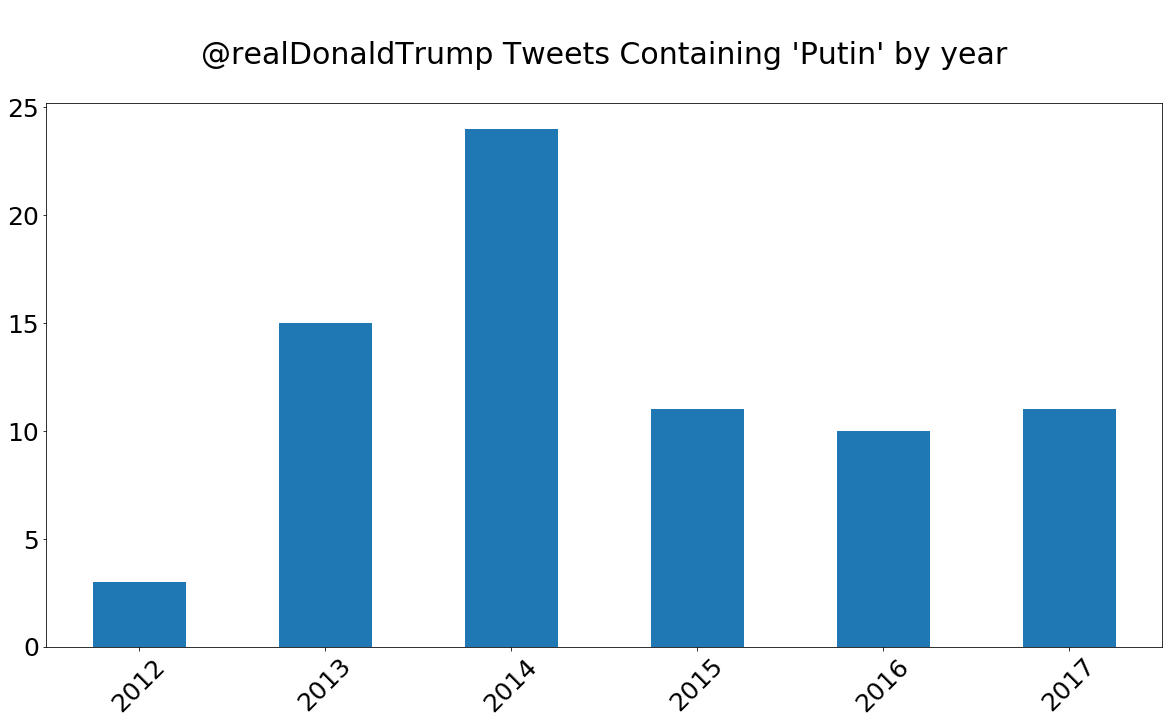

In [16]:
putin_filter = tweets.text.str.contains('putin', case=False)
tweets[putin_filter].created_at.dt.year.value_counts().sort_index().plot(kind='bar', 
    rot=45, figsize=(20, 10), fontsize=25)
plt.title("\n@realDonaldTrump Tweets Containing 'Putin' by year\n", size=30);

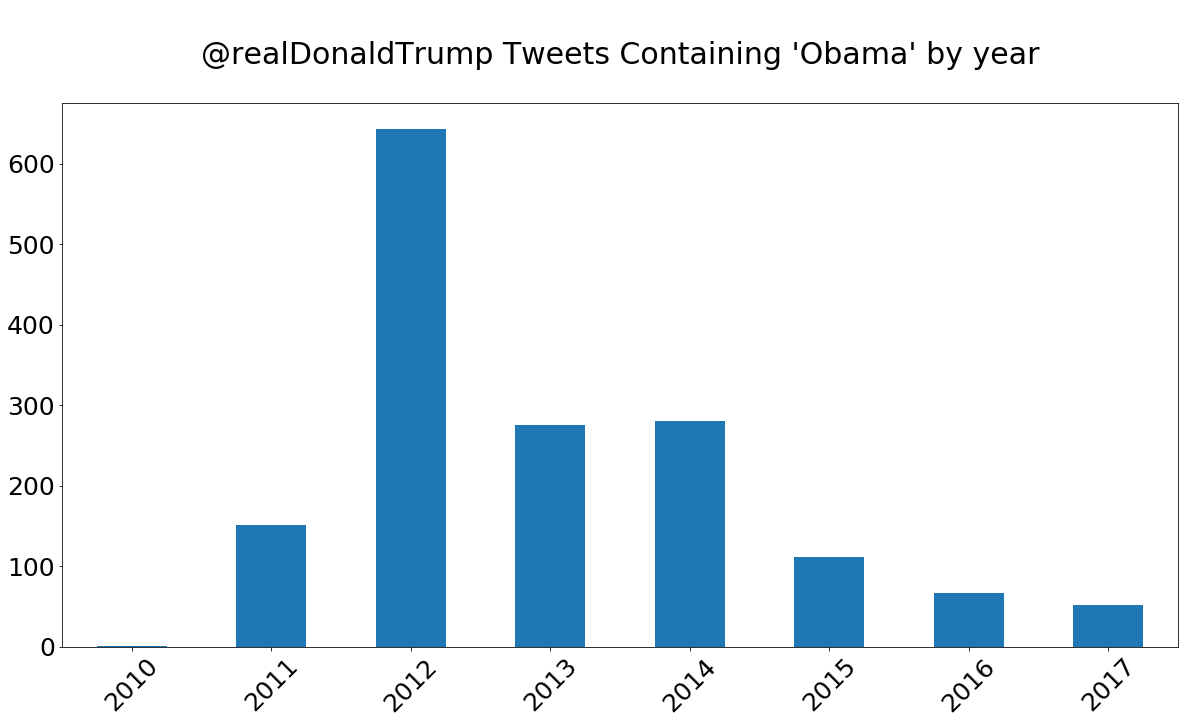

In [17]:
obama_filter = tweets.text.str.contains('obama +', case=False)
tweets[obama_filter].created_at.dt.year.value_counts().sort_index().plot(kind='bar', 
    rot=45, figsize=(20, 10), fontsize=25)
plt.title("\n@realDonaldTrump Tweets Containing 'Obama' by year\n", size=30);

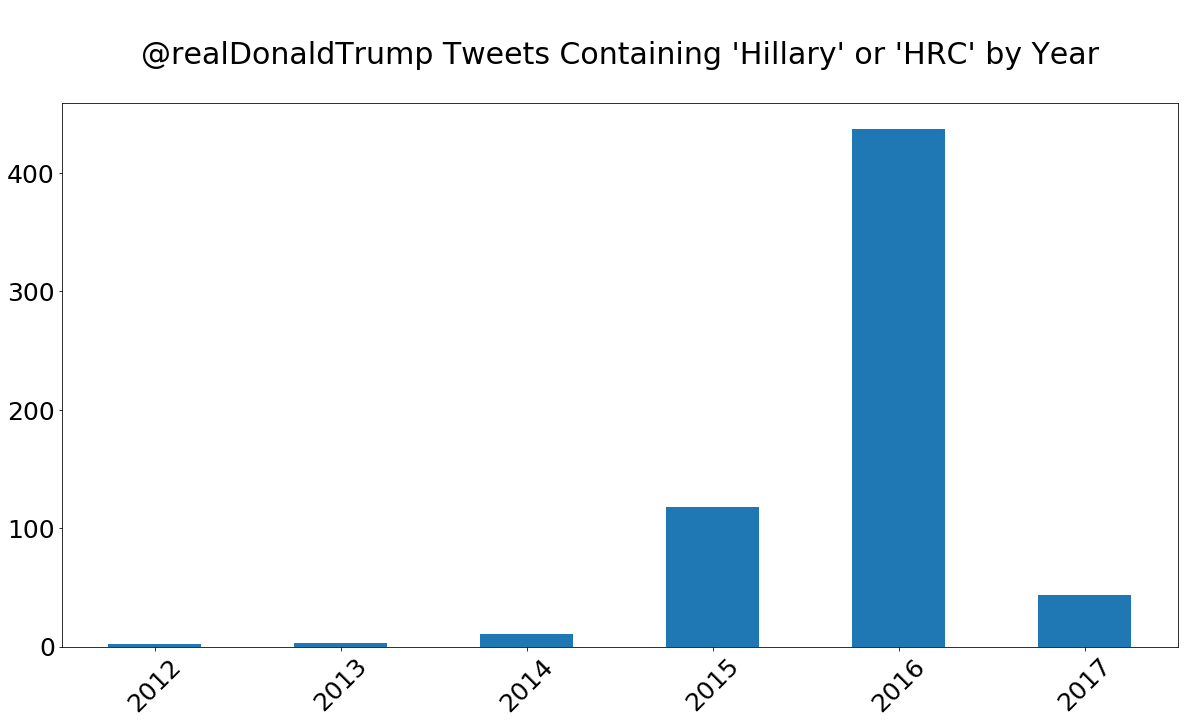

In [18]:
pattern = '(hillary )|(hrc)'
hillary_filter = tweets.text.str.lower().str.count(pattern).astype(bool)
tweets[hillary_filter].created_at.dt.year.value_counts().sort_index().plot(kind='bar', 
    rot=45, figsize=(20, 10), fontsize=25);
plt.title("\n@realDonaldTrump Tweets Containing 'Hillary' or 'HRC' by Year\n", size=30);

### We will create 4 separate DataFrames dividing tweets into the following periods: 1. pre-candidacy 2. candidacy (6/16/2015 - 11/8/2016) 3. transition (11/8/2016-1/20/2017) and 4. presidency (1/20/2017-?).

In [19]:
inauguration = pd.to_datetime('1/20/2017')

In [20]:
start_of_candidacy = pd.to_datetime('6/16/2015')

In [21]:
election_day = pd.to_datetime('11/8/2016')

In [22]:
inauguration_day = pd.to_datetime('1/20/2017')

In [23]:
pre_candidacy_tweets = tweets[tweets['US/Eastern'] < start_of_candidacy]

In [24]:
candidacy_tweets = tweets[(tweets['US/Eastern'] >= start_of_candidacy) & (tweets['US/Eastern'] <= election_day)]

In [25]:
transition_tweets = tweets[(tweets['US/Eastern'] > election_day) & (tweets['US/Eastern'] < inauguration_day)]

In [26]:
presidency_tweets = tweets[tweets['US/Eastern'] >= inauguration_day]

### The number of tweets in each category.

In [27]:
pre_candidacy_tweets.shape[0]

20063

In [28]:
candidacy_tweets.shape[0]

7057

In [29]:
transition_tweets.shape[0]

388

In [30]:
presidency_tweets.shape[0]

2353

## <center>An analysis of tweets by hour of the day.</center>

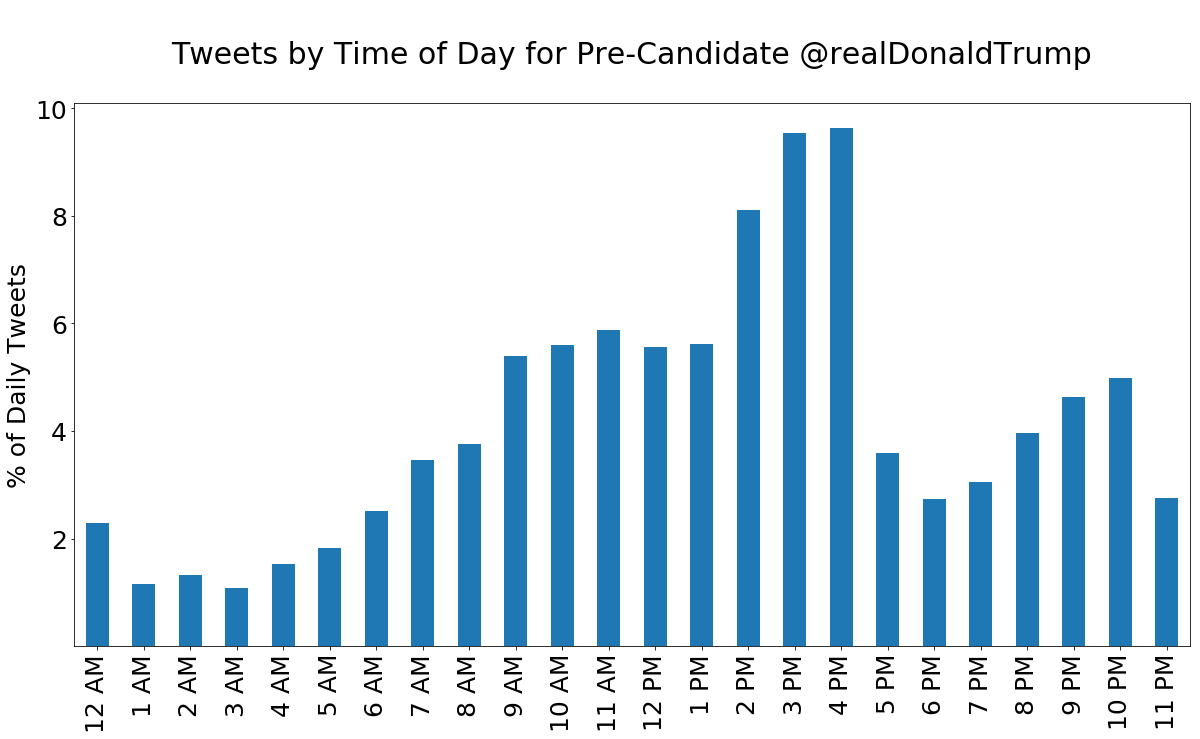

In [31]:
hours = [re.sub('^0', '', datetime.time(i).strftime('%I %p')) for i in range(24)]
pre_candidacy_tweets['US/Eastern'].dt.hour.value_counts(normalize=True).sort_index().plot(kind='bar',
            figsize=(20, 10), fontsize=25)
plt.xticks([i for i in range(24)], hours, size=25)
plt.yticks(np.linspace(0.02, 0.10, 5), (pd.Series(np.linspace(0.02, 0.10, 5)) * 100).astype(int))
plt.ylabel('% of Daily Tweets', size=25)
plt.title('\nTweets by Time of Day for Pre-Candidate @realDonaldTrump\n', size=30);

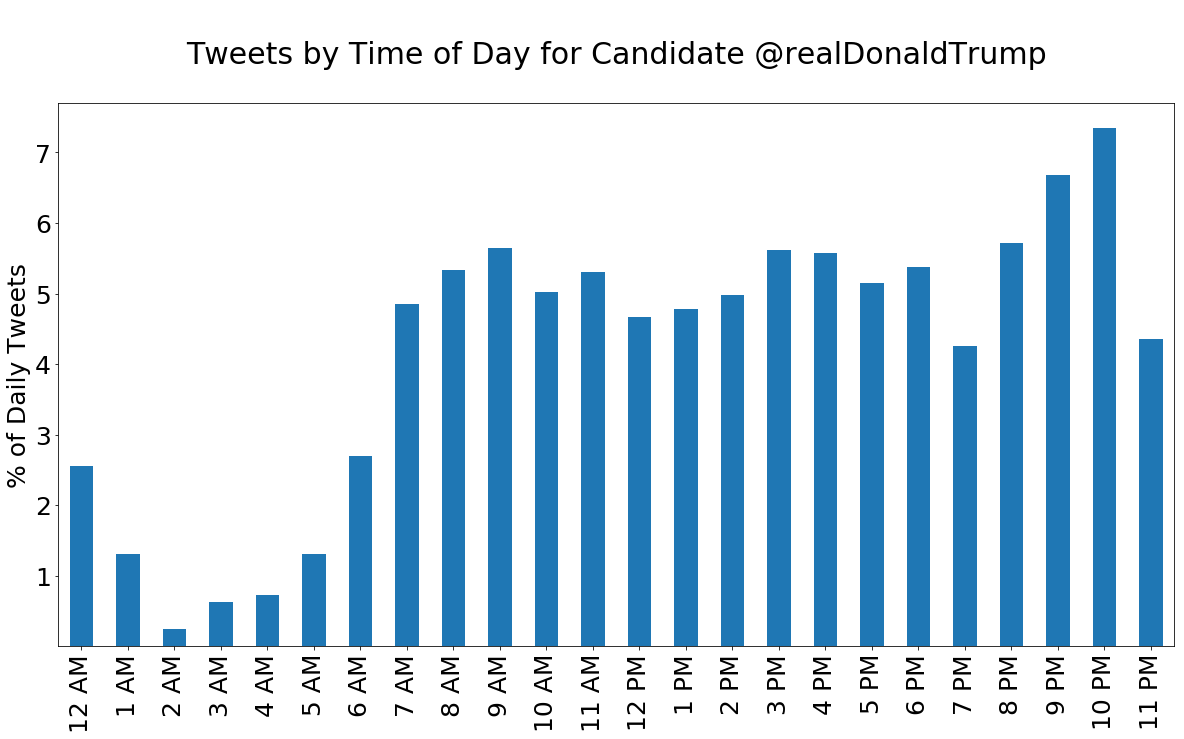

In [32]:
candidacy_tweets['US/Eastern'].dt.hour.value_counts(normalize=True).sort_index().plot(kind='bar',
            figsize=(20, 10), fontsize=25)
plt.xticks([i for i in range(24)], hours, size=25)
plt.yticks(np.linspace(0.01, 0.07, 7), (pd.Series(np.linspace(0.01, 0.07, 7)) * 100).astype(int))
plt.ylabel('% of Daily Tweets', size=25)
plt.title('\nTweets by Time of Day for Candidate @realDonaldTrump\n', size=30);

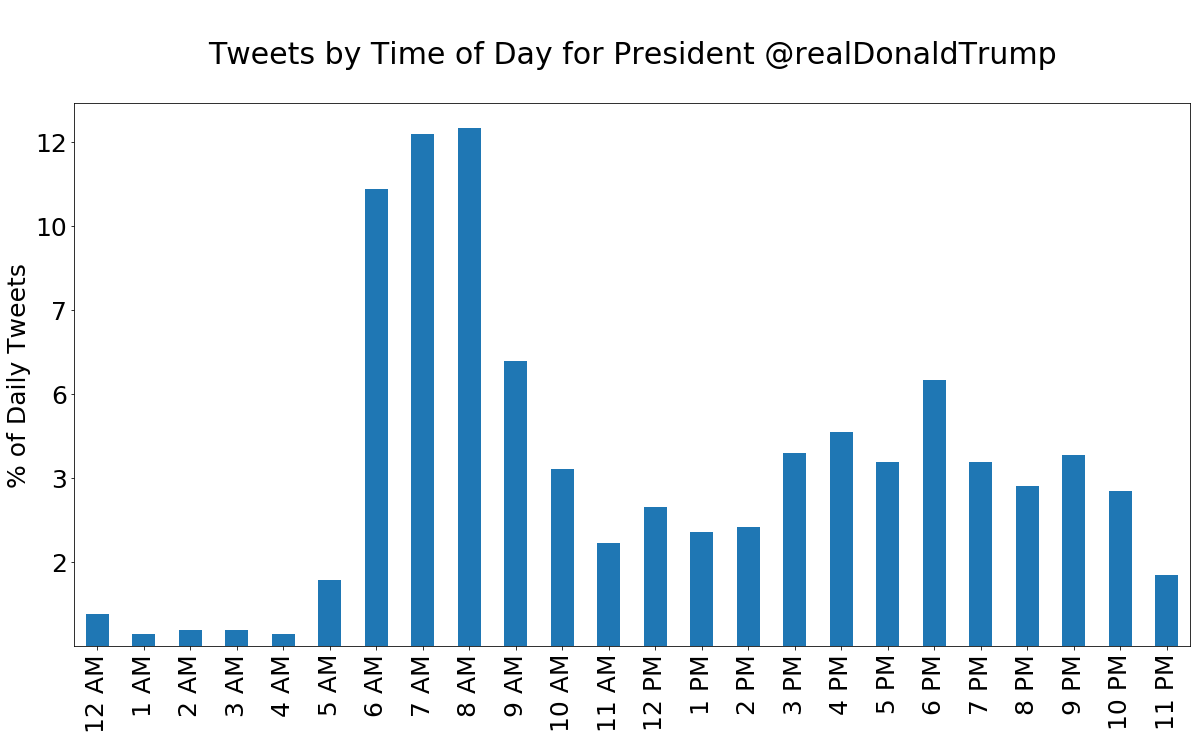

In [33]:
presidency_tweets['US/Eastern'].dt.hour.value_counts(normalize=True).sort_index().plot(kind='bar',
            figsize=(20, 10), fontsize=25)
plt.xticks([i for i in range(24)], hours, size=25)
plt.yticks(np.linspace(0.02, 0.12, 6), (pd.Series(np.linspace(0.02, 0.12, 6)) * 100).astype(int))
plt.ylabel('% of Daily Tweets', size=25)
plt.title('\nTweets by Time of Day for President @realDonaldTrump\n', size=30);

## <center>An analysis of tweets by day of the week.</center>

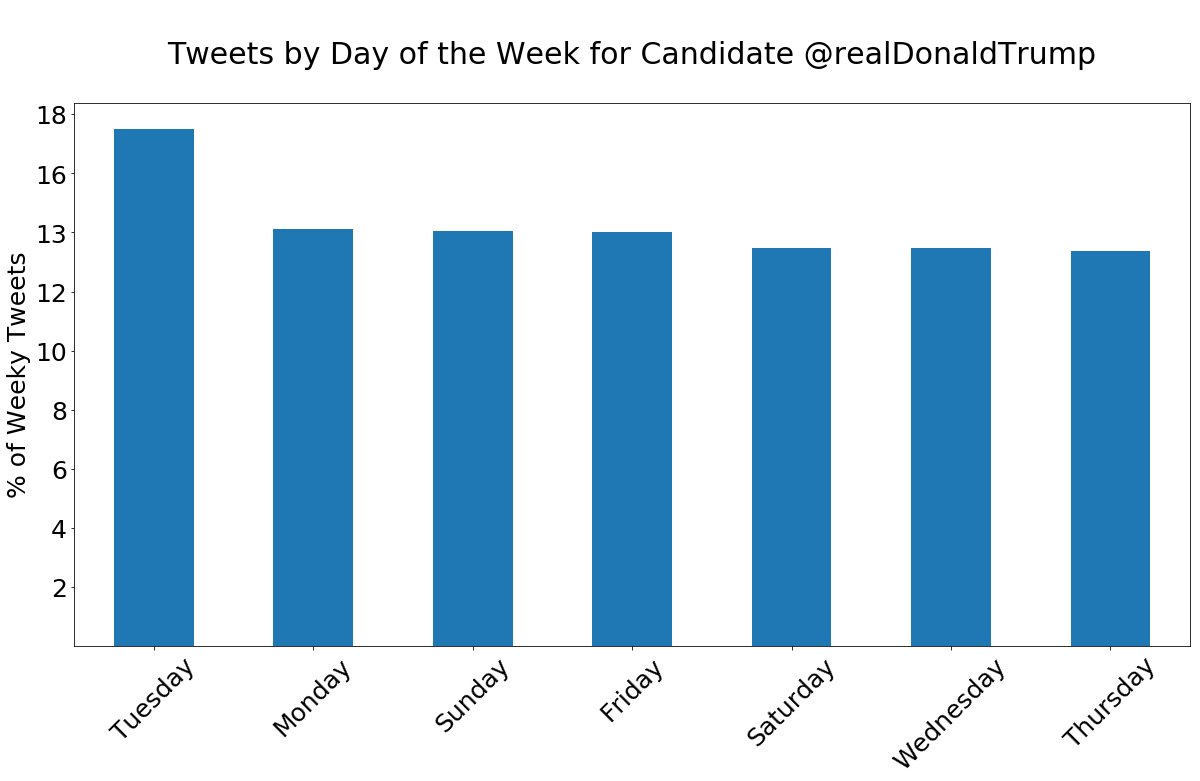

In [34]:
candidacy_tweets['US/Eastern'].dt.weekday_name.value_counts(normalize=True).plot(kind='bar',
        figsize=(20, 10), fontsize=25, rot=45)
plt.yticks(np.linspace(0.02, 0.18, 9), (pd.Series(np.linspace(0.02, 0.18, 9)) * 100).astype(int))
plt.ylabel('% of Weeky Tweets', size=25)
plt.title('\nTweets by Day of the Week for Candidate @realDonaldTrump\n', size=30);

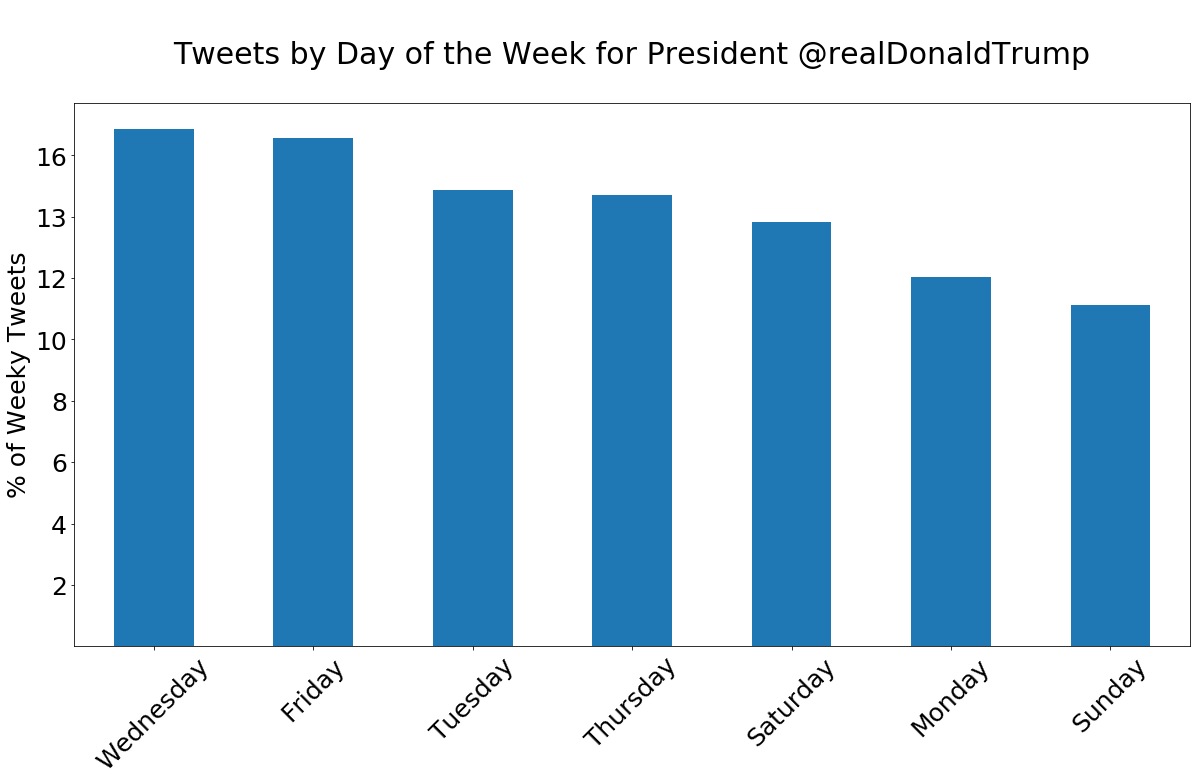

In [35]:
presidency_tweets['US/Eastern'].dt.weekday_name.value_counts(normalize=True).plot(kind='bar',
        figsize=(20, 10), fontsize=25, rot=45)
plt.yticks(np.linspace(0.02, 0.16, 8), (pd.Series(np.linspace(0.02, 0.16, 8)) * 100).astype(int))
plt.ylabel('% of Weeky Tweets', size=25)
plt.title('\nTweets by Day of the Week for President @realDonaldTrump\n', size=30);

## <center>Tweet counts with key words or phrases.</center>

In [36]:
vaccine_filter = tweets.text.str.contains('vaccin', case=False)
print(f"There are {vaccine_filter.sum()} tweets with some variation of 'vaccin'(including vaccine(s), vaccination(s)).")

There are 30 tweets with some variation of 'vaccin'(including vaccine(s), vaccination(s)).


In [37]:
global_warming_filter = tweets.text.str.contains('global ?warming', case=False)
print(f"There are {global_warming_filter.sum()} tweets with some variation of 'global warming'.")

There are 106 tweets with some variation of 'global warming'.


In [38]:
china_filter = tweets.text.str.contains('china', case=False)
print(f"There are {china_filter.sum()} tweets with some variation of 'China'.")

There are 448 tweets with some variation of 'China'.


In [39]:
iraq_filter = tweets.text.str.contains('iraq', case=False)
print(f"There are {iraq_filter.sum()} tweets with some variation of 'Iraq'.")

There are 161 tweets with some variation of 'Iraq'.


In [40]:
fake_news_filter = tweets.text.str.contains('fake ?news', case=False)
print(f"There are {fake_news_filter.sum()} tweets with some variation of 'fake news'.")

There are 163 tweets with some variation of 'fake news'.


In [41]:
merry_christmas_filter = tweets.text.str.contains('merry ?christmas', case=False)
print(f"There are {merry_christmas_filter.sum()} tweets with some variation of 'Merry Christmas'.")

There are 30 tweets with some variation of 'Merry Christmas'.
